In [1]:
from datetime import datetime
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
start = "01/04/19"
end ="02/03/23"

symbols = ["3407.JP","7453.JP","5021.JP","6504.JP","8035.JP","8830.JP","3626.JP","4062.JP","3861.JP","4206.JP"]

master_df = data.DataReader(symbols,"stooq",start,end)['Close'].sort_index()

In [3]:
master_df

Symbols,3407.JP,7453.JP,5021.JP,6504.JP,8035.JP,8830.JP,3626.JP,4062.JP,3861.JP,4206.JP
Date,,,,,,,,,,
2019-01-04,995.011,2414.78,1935.83,3058.31,10748.0,3769.51,1344.82,1396.80,510.623,3048.78
2019-01-07,1048.090,2460.19,1952.88,3165.27,11430.8,3890.10,1412.79,1452.24,528.782,3212.52
2019-01-08,1044.910,2473.18,2072.28,3170.14,11611.7,3870.01,1433.32,1463.70,522.437,3247.91
2019-01-09,1043.550,2488.01,2101.26,3179.86,11801.6,3851.84,1482.30,1448.39,541.513,3261.18
2019-01-10,1028.570,2229.47,2077.39,3087.48,12109.1,3848.00,1434.90,1443.62,544.242,3181.53
...,...,...,...,...,...,...,...,...,...,...
2023-01-27,971.000,1429.00,3695.00,5190.00,45480.0,3172.00,3715.00,5050.00,535.000,3105.00
2023-01-30,972.300,1433.00,3680.00,5250.00,45790.0,3156.00,3735.00,5160.00,532.000,3105.00
2023-01-31,982.400,1434.00,3620.00,5220.00,45170.0,3156.00,3730.00,5010.00,536.000,3130.00


In [4]:
df_day= master_df.pct_change()

returns_annual = df_day.mean()*245

cov_annual=df_day.cov()*245

In [5]:
num=100000
np.random.seed(0)

port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

In [6]:
# 様々な銘柄の比率でのポートフォリオのリターンとリスクを計算
for i in range(num): # single_portfolio

	# 銘柄の比率を乱数で決定
	weights = np.random.uniform(1,10000,len(symbols))
	weights=weights**5
	weights /= np.sum(weights)

	# ポートフォリオの期待リターンを計算
	returns = np.dot(weights, returns_annual)

	# ポートフォリオのボラティリティを計算
	volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

	# シャープレシオを計算
	sharpe = returns / volatility
	sharpe_ratio.append(sharpe)

	# 計算値をリストに格納
	port_returns.append(returns)
	port_volatility.append(volatility)
	stock_weights.append(weights)

# 辞書型に格納
portfolio = {"Returns": port_returns,
			"Volatility": port_volatility,
			"Sharpe Ratio" : sharpe_ratio}

# 計算したポートフォリオのリターンとリスクに、比率のデータを加える
for counter,symbol in enumerate(symbols):
    portfolio[str(symbol) + " Weight"] = [Weight[counter] for Weight in stock_weights]



In [7]:
df = pd.DataFrame(portfolio)
# データフレーム完成

df.tail(10)

,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
99990,0.158353,0.235815,0.671516,1.145382e-01,0.000270,1.148317e-03,3.825154e-04,0.053588,1.146334e-01,1.416089e-03,2.543451e-01,4.596768e-01,0.000001
99991,0.175263,0.241515,0.725680,5.792065e-03,0.181435,2.442292e-01,2.650942e-01,0.023386,4.693163e-02,2.303627e-01,1.629764e-03,1.137654e-03,0.000002
99992,0.034895,0.231162,0.150954,2.459493e-01,0.280412,4.168598e-02,6.519945e-11,0.036131,3.351024e-03,9.519681e-05,1.798420e-03,4.613984e-02,0.344437
99993,0.352591,0.331064,1.065026,1.762417e-02,0.002430,4.968704e-02,1.152094e-01,0.003561,7.518357e-03,1.280941e-01,6.757545e-01,1.792654e-10,0.000121
99994,0.276882,0.280134,0.988391,4.544242e-03,0.171498,3.034562e-05,4.338167e-07,0.580569,3.976635e-04,6.940982e-03,6.316809e-02,5.324649e-11,0.172851
99995,0.075907,0.269769,0.281377,2.289968e-10,0.000157,1.907992e-07,7.141579e-02,0.032840,7.167410e-04,2.533361e-05,7.991003e-08,8.859922e-01,0.008853
99996,0.065895,0.248638,0.265022,3.284899e-01,0.000351,1.006237e-01,4.291777e-07,0.000037,8.844639e-09,1.613083e-05,4.072803e-05,5.647838e-01,0.005657
99997,0.060497,0.256756,0.235622,6.690285e-01,0.000063,1.919574e-02,4.026490e-06,0.017925,1.158351e-02,2.163213e-02,6.954181e-03,2.331389e-01,0.020475
99998,0.173127,0.236189,0.733000,1.969903e-01,0.003019,1.656724e-03,3.007691e-04,0.354364,1.557018e-01,7.637316e-07,5.928992e-06,6.268277e-05,0.287898
99999,0.147222,0.242447,0.607235,1.053184e-02,0.018911,1.506340e-05,2.722269e-01,0.166786,2.557055e-06,2.189137e-04,5.031864e-03,2.950138e-02,0.496775


In [8]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# ポートフォリオをテキスト出力(ソートして出力)
print("\n---sharpe_portfolio-----\n") # 最大SR
sharpe_sort=sharpe_portfolio.iloc[:,3:].T
sharpe_sort.sort_values(by=sharpe_sort.columns[0] ,ascending=False ,axis=0,inplace=True)
print(sharpe_portfolio.iloc[:,0:2].T)
print(sharpe_sort)

print("\n---min_variance_port-----\n") # 最少分散ポートフォリオ
min_sort=min_variance_port.iloc[:,3:].T
min_sort.sort_values(by=min_sort.columns[0] ,ascending=False ,axis=0,inplace=True)
print(min_variance_port.iloc[:,0:2].T)
print(min_sort)


---sharpe_portfolio-----

               63570
Returns     0.357899
Volatility  0.265866
                       63570
3626.JP Weight  4.520762e-01
8035.JP Weight  4.009044e-01
4062.JP Weight  9.156346e-02
5021.JP Weight  5.308387e-02
8830.JP Weight  1.263691e-03
4206.JP Weight  5.983934e-04
7453.JP Weight  4.121727e-04
3407.JP Weight  9.785308e-05
6504.JP Weight  5.965014e-09
3861.JP Weight  8.920428e-10

---min_variance_port-----

               57558
Returns     0.129711
Volatility  0.201505
                   57558
3626.JP Weight  0.219174
3861.JP Weight  0.203754
4206.JP Weight  0.173563
7453.JP Weight  0.146243
5021.JP Weight  0.090666
8035.JP Weight  0.075780
8830.JP Weight  0.068679
3407.JP Weight  0.018833
4062.JP Weight  0.002756
6504.JP Weight  0.000553


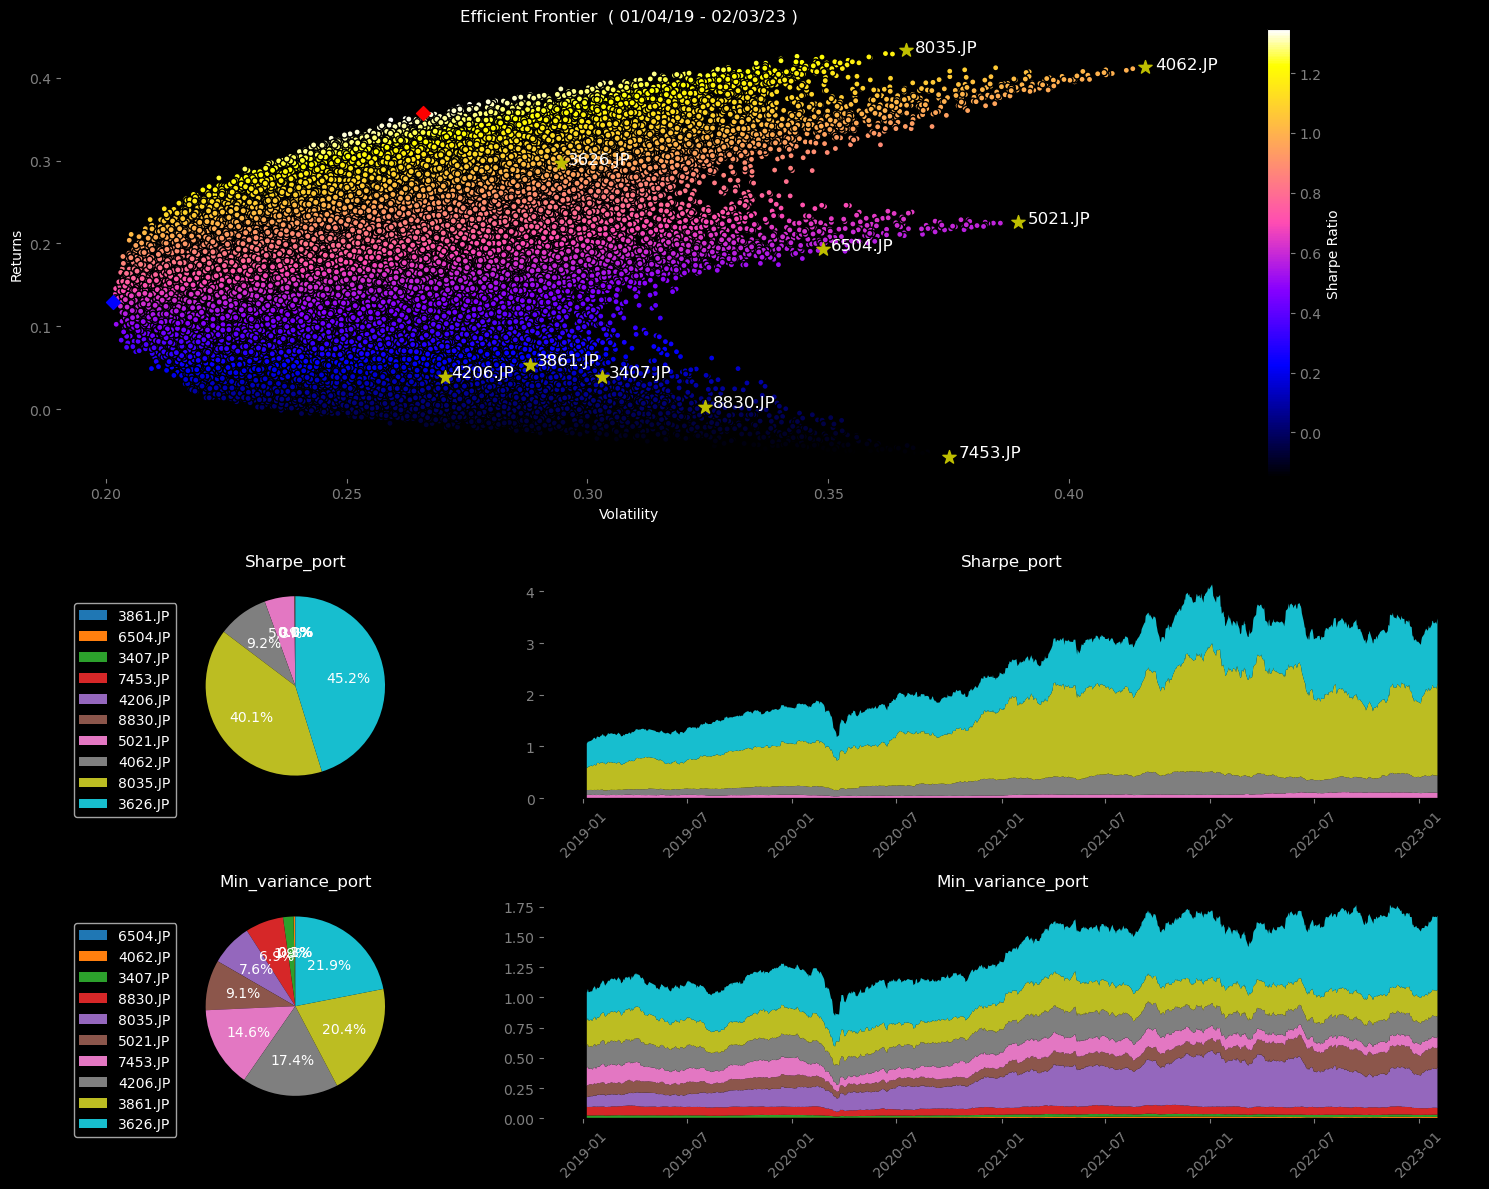

In [9]:
# グラフパラメータ設定
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["axes.labelcolor"] = 'white'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'white'

# グラフ領域設定
fig = plt.figure(facecolor='white',figsize=(15,12),tight_layout="True")
spec = gridspec.GridSpec(ncols=2, nrows=3,height_ratios=[1,0.5,0.5],width_ratios=[0.5,1])

#　グラフに領域を割り当て
ax1 =  fig.add_subplot(spec[0,:], title='Efficient Frontier  ( '+str(start) +" - "+str(end)+ " )")
ax2 =  fig.add_subplot(spec[1,0], title='Sharpe_port' )
ax3 =  fig.add_subplot(spec[2,0], title='Min_variance_port')
ax4 =  fig.add_subplot(spec[1,1], title='Sharpe_port')
ax5 =  fig.add_subplot(spec[2,1], title='Min_variance_port')
fig.patch.set_facecolor('black')

# フロンティア、シャープ最大値、ボラティリティ最小値の散布図
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',cmap='gnuplot2', edgecolors='black',alpha=1, ax=ax1)
ax1.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=50)
ax1.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=50 )

for counter,stock in enumerate(symbols):

   volatility = np.sqrt(cov_annual.loc[stock,stock])
   ax1.scatter(x=volatility, y=returns_annual[stock], c='y', marker='*', s=100)
   ax1.annotate(stock, (volatility*1.005, returns_annual[stock]*0.995),size=12,color="white")

# パイチャート1
df_pie1=sharpe_portfolio.T.iloc[3:,:]
df_pie1=df_pie1.sort_values(by=df_pie1.columns[0], axis=0, ascending=True, inplace=False)
col1=[s.replace(' Weight', '') for s in df_pie1.index.tolist()]
ax2.pie(df_pie1.iloc[:,0].tolist(), autopct="%1.1f%%",startangle=90)
ax2.legend(col1,fontsize=10,  bbox_to_anchor=(0, 0.9))


# パイチャート２
df_pie2=min_variance_port.T.iloc[3:,:]
df_pie2=df_pie2.sort_values(by=df_pie2.columns[0], axis=0, ascending=True, inplace=False)
col2=[s.replace(' Weight', '') for s in df_pie2.index.tolist()]
ax3.pie(df_pie2.iloc[:,0].tolist(), autopct="%1.1f%%",startangle=90)
ax3.legend(col2,fontsize=10,  bbox_to_anchor=(0, 0.9))


# 積み上げグラフの元データ
df_all=(1+master_df.pct_change()).cumprod()

# 積み上げグラフ１
df_sharpe=df_all.loc[:,col1]
for i in range(len(col1)):
 df_sharpe.iloc[:,i]=df_sharpe.iloc[:,i] * df_pie1.iloc[:,0].values[i]
ax4.stackplot(df_sharpe.index, df_sharpe.values.T)
ax4.tick_params(axis='x', labelrotation=45)

# 積み上げグラフ２
df_min=df_all.loc[:,col2]
for i in range(len(col2)):
 df_min.iloc[:,i]=df_min.iloc[:,i] * df_pie2.iloc[:,0].values[i]
ax5.stackplot(df_min.index, df_min.values.T)
ax5.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

In [10]:
df_sharpe = df.sort_values("Sharpe Ratio", ascending=True)
print("\n---sharpe_portfolio-----\n")
df_sharpe.tail(1)


---sharpe_portfolio-----



,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
63570,0.357899,0.265866,1.346165,0.000098,0.000412,0.053084,5.965014e-09,0.400904,0.001264,0.452076,0.091563,8.920428e-10,0.000598


In [11]:
df_min = df.sort_values("Volatility", ascending=True)
print("\n---min_variance_port-----\n")
df_min.head(1)


---min_variance_port-----



,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
57558,0.129711,0.201505,0.64371,0.018833,0.146243,0.090666,0.000553,0.07578,0.068679,0.219174,0.002756,0.203754,0.173563


In [12]:
ddff=df_sharpe.tail(1).drop(["Returns","Volatility","Sharpe Ratio"],axis=1)
x=[]
for i in range(0,len(ddff.columns)):
    x.append(round(ddff.iat[0,i],8))

# ポートフォリオ株価を求める際に、このリストをコピペで貼る
print(x)

[9.785e-05, 0.00041217, 0.05308387, 1e-08, 0.40090437, 0.00126369, 0.45207618, 0.09156346, 0.0, 0.00059839]
